# Austrilia Weather Prediction

## 1. Data pre-treatment

In [78]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import time

# find_best_params():
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# feature selection
from sklearn.feature_selection import RFE
import warnings

warnings.filterwarnings('ignore')

In [7]:
weather_data = pd.read_csv('weatherAUS.csv')

In [8]:
weather_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


### 1.2 Feature Processing
#### 1.2.1 String-to-number Encoding:
##### RainToday & RainTomorrow

In [9]:
# replace the target values with 0 and 1.
mapping = {'Yes': 1, 'No': 0}
weather_data = weather_data.replace({'RainTomorrow': mapping,'RainToday':mapping})
weather_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0.0,1.4,1
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,0


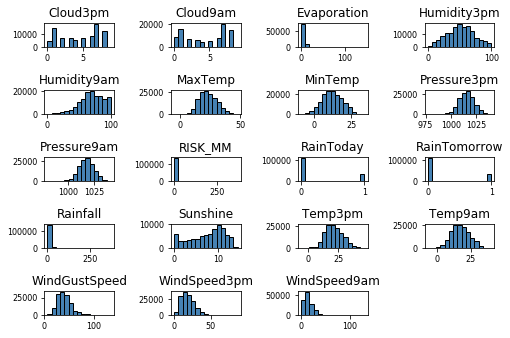

In [10]:
# distribution of each feature
weather_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

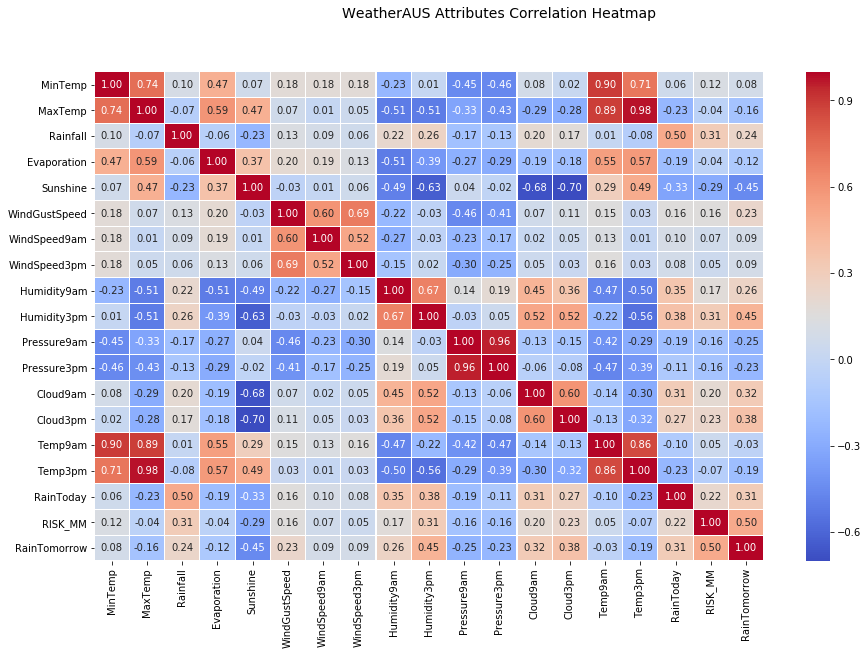

In [11]:
# compute the correlation coefficients matris

f, ax = plt.subplots(figsize=(15, 9))
corr = weather_data.corr()
red_hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
#f.subplots_adjust(top=0.93)
t= f.suptitle('WeatherAUS Attributes Correlation Heatmap', fontsize=14)

In [12]:
# handling feature 'Date', convert string of date to 3 numbers: year, month and date.
def split_Date(df):
    #Wildcard:
    #?:-0 or 1; +: 1 or more; *:0 or more.
    df['Year'] = df['Date'].str.extract(r'(\d\d\d\d)-') 
    df['Month'] = df['Date'].str.extract(r'-(\d\d)-')
    df['Day'] = df['Date'].str.extract(r'-\d\d-(\d\d)')
    df.drop('Date', axis=1, inplace=True)
    print('Dates splitted.')
    return df

In [13]:
weather_df = split_Date(weather_data)

Dates splitted.


#### 1.2.2 One-Hot Encoding
##### Location & WindDir

In [14]:
# handling feature 'Location'. One-hot encoding
def process_Location(df):
    
    # encoding in dummy variable
    loc_dummies = pd.get_dummies(df['Location'], prefix='Loc')
    df = pd.concat([df, loc_dummies], axis=1)
    
    # removing the original variable
    df.drop('Location', axis=1, inplace=True)
    
    print("Location processing finished.")
    return df

In [15]:
# handling features related to Wind Directions. One-hot encoding.
def process_WindDir(df):
    
    # encoding in dummy variable
    WD9_dummies = pd.get_dummies(df['WindDir9am'], prefix='WD9')
    df = pd.concat([df, WD9_dummies], axis=1)
    
    # encoding in dummy variable
    WD3_dummies = pd.get_dummies(df['WindDir3pm'], prefix='WD3')
    df = pd.concat([df, WD3_dummies], axis=1)
    
    # encoding in dummy variable
    WGD_dummies = pd.get_dummies(df['WindGustDir'], prefix='WGD')
    df = pd.concat([df, WGD_dummies], axis=1)
    
    # removing the original variable
    df.drop('WindGustDir', axis=1, inplace=True)
    df.drop('WindDir9am', axis=1, inplace=True)
    df.drop('WindDir3pm', axis=1, inplace=True)
    
    print("WindDir processing finished.")
    return df

In [16]:
weather_df = process_Location(weather_df)
weather_df = process_WindDir(weather_df)

Location processing finished.
WindDir processing finished.


### 1.3 Missing Values

In [17]:
#count the nan values in each feature
weather_df.isnull().sum()

MinTemp                637
MaxTemp                322
Rainfall              1406
Evaporation          60843
Sunshine             67816
WindGustSpeed         9270
WindSpeed9am          1348
WindSpeed3pm          2630
Humidity9am           1774
Humidity3pm           3610
Pressure9am          14014
Pressure3pm          13981
Cloud9am             53657
Cloud3pm             57094
Temp9am                904
Temp3pm               2726
RainToday             1406
RISK_MM                  0
RainTomorrow             0
Year                     0
Month                    0
Day                      0
Loc_Adelaide             0
Loc_Albany               0
Loc_Albury               0
Loc_AliceSprings         0
Loc_BadgerysCreek        0
Loc_Ballarat             0
Loc_Bendigo              0
Loc_Brisbane             0
                     ...  
WD3_ESE                  0
WD3_N                    0
WD3_NE                   0
WD3_NNE                  0
WD3_NNW                  0
WD3_NW                   0
W

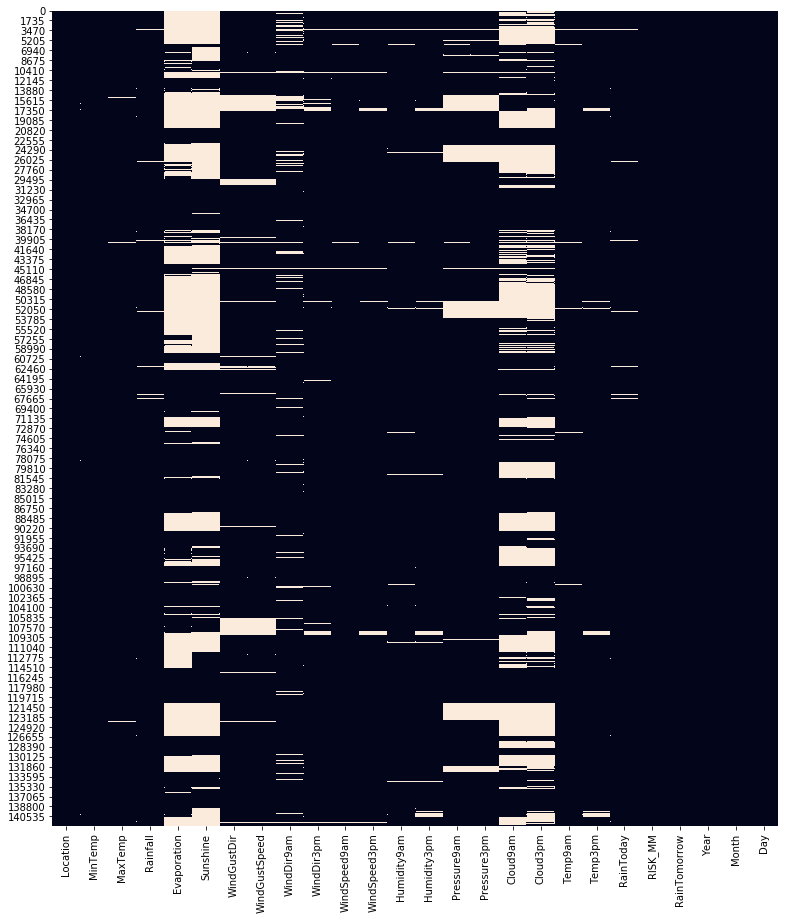

In [18]:
#visualize missing value
plt.figure(figsize = (13,15))
ax = sns.heatmap(weather_data.isnull(), cbar=False)

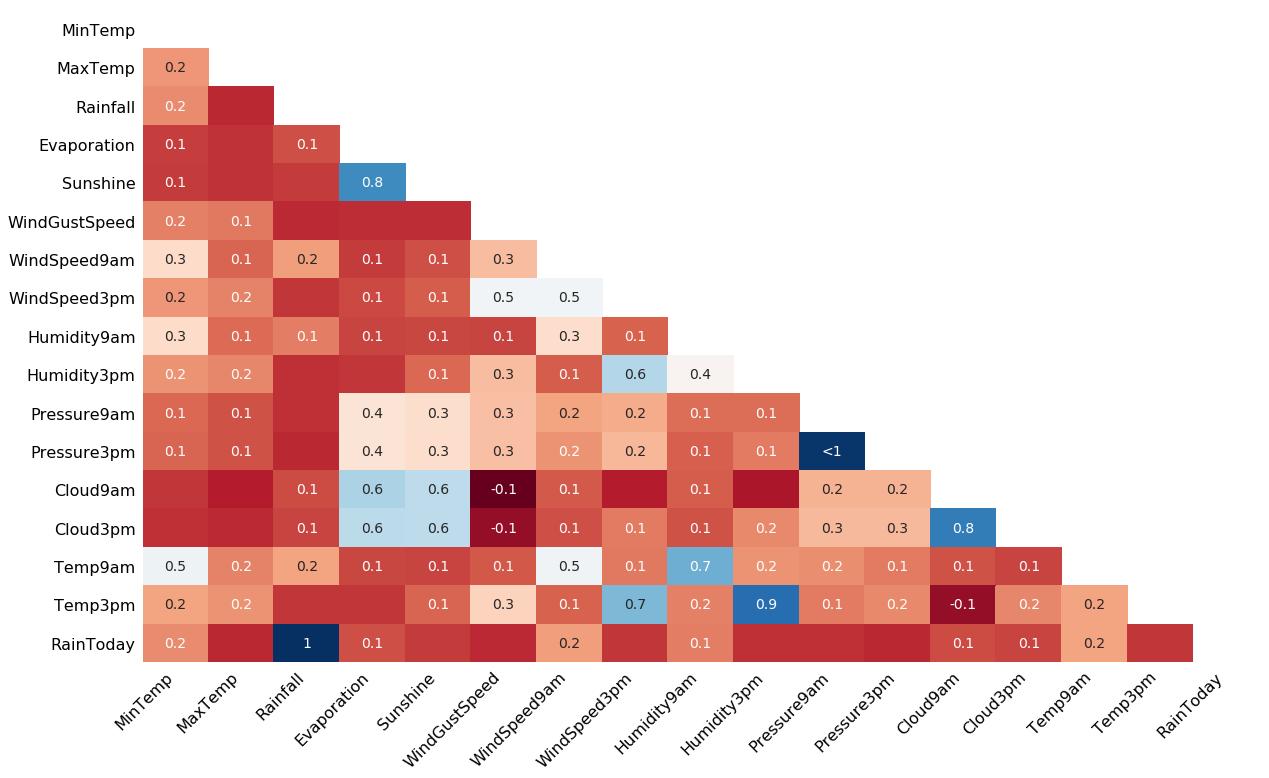

In [19]:
#missingno: an model for missing value handling
#The missingno correlation heatmap measures nullity correlation: 
#how strongly the presence or absence of one variable affects the presence of another

#To install missingno: pip install missingno
import missingno as msno
msno.heatmap(weather_df)

In [20]:
#count how many rows have no less than t not-null values.
def count_not_nans(df, t):
    threshold = t
    counts = 0
    notnan_counts = []
    for index, row in df.iterrows():
        count_notnan = row[:].notnull().sum()
        if count_notnan >= threshold:
            counts+=1
            notnan_counts.append(count_notnan)
    #print(counts) 
    #print(nan_counts)
    return counts

In [21]:
#count how many rows have no less than t nan values.
def count_nans(df, t):
    threshold = t
    counts = 0
    nan_counts = []
    for index, row in df.iterrows():
        count_nan = row[:].isnull().sum()
        if count_nan >= threshold:
            counts+=1
            nan_counts.append(count_nan)
    #print(counts) 
    #print(nan_counts) 
    return counts

#### 1.3.1 Extract not-NaN subset

In [22]:
def extract_notnan(df):
    indexer = []
    for index, row in df.iterrows():
        if row[:].notnull().sum() == len(df.columns):
            indexer.append(index)
    subset = df.loc[indexer,:]
    return subset, indexer
# subset of function is equivalent to .dropna()

In [23]:
#count_nans(weather_df, 9)

In [24]:
df2 = pd.DataFrame(np.array([[1, 2, 3, 4, 5], [4, 5, 6, 7, 8], [np.nan, np.nan, 0, 1, 2], [7, 8, 9, 10, 11], [np.nan, 4, 9, np.nan, np.nan], [np.nan, np.nan, 10, np.nan, 11]]),
...                    columns=['a', 'b', 'c', 'd', 'e'])
df2

,a,b,c,d,e
0,1.0,2.0,3.0,4.0,5.0
1,4.0,5.0,6.0,7.0,8.0
2,NaN,NaN,0.0,1.0,2.0
3,7.0,8.0,9.0,10.0,11.0
4,NaN,4.0,9.0,NaN,NaN
5,NaN,NaN,10.0,NaN,11.0


In [25]:
weather_pro, index_pro = extract_notnan(weather_df)

In [26]:
weather_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58090 entries, 5939 to 139112
Columns: 119 entries, MinTemp to WGD_WSW
dtypes: float64(18), int64(1), object(3), uint8(97)
memory usage: 15.6+ MB


In [27]:
weather_pro_X = weather_pro.drop(columns = ['RainTomorrow'])

#### 1.3.2 Replacing NaN values

##### a. With -9999

In [28]:
weather_9999 = weather_df.fillna(-9999)

In [29]:
weather_9999.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WGD_NNW,WGD_NW,WGD_S,WGD_SE,WGD_SSE,WGD_SSW,WGD_SW,WGD_W,WGD_WNW,WGD_WSW
0,13.4,22.9,0.6,-9999.0,-9999.0,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,-9999.0,-9999.0,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,-9999.0,-9999.0,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,-9999.0,-9999.0,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,-9999.0,-9999.0,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,1,0,0


##### b. By K-means clustering

In [30]:
weather_df.isnull().sum()

MinTemp                637
MaxTemp                322
Rainfall              1406
Evaporation          60843
Sunshine             67816
WindGustSpeed         9270
WindSpeed9am          1348
WindSpeed3pm          2630
Humidity9am           1774
Humidity3pm           3610
Pressure9am          14014
Pressure3pm          13981
Cloud9am             53657
Cloud3pm             57094
Temp9am                904
Temp3pm               2726
RainToday             1406
RISK_MM                  0
RainTomorrow             0
Year                     0
Month                    0
Day                      0
Loc_Adelaide             0
Loc_Albany               0
Loc_Albury               0
Loc_AliceSprings         0
Loc_BadgerysCreek        0
Loc_Ballarat             0
Loc_Bendigo              0
Loc_Brisbane             0
                     ...  
WD3_ESE                  0
WD3_N                    0
WD3_NE                   0
WD3_NNE                  0
WD3_NNW                  0
WD3_NW                   0
W

In [31]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.223423,2.360682,0.224181
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.416541,8.477969,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,0.800000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000


In [32]:
# from sklearn.cluster import KMeans
# X = np.array([[1, 2], [1, 4], [1, 0],
#               [10, 2], [10, 4], [10, 0]])
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# kmeans.labels_

# kmeans.predict([[0, 0], [12, 3]])

# kmeans.cluster_centers_

In [33]:
for_MinTemp = weather_df.dropna(subset=['Temp9am','MaxTemp','Temp3pm','Humidity9am','WindSpeed9am'])
for_MinTemp.isnull().sum()

MinTemp                199
MaxTemp                  0
Rainfall              1082
Evaporation          57852
Sunshine             63609
WindGustSpeed         6649
WindSpeed9am             0
WindSpeed3pm           106
Humidity9am              0
Humidity3pm            156
Pressure9am          11779
Pressure3pm          11726
Cloud9am             51361
Cloud3pm             52747
Temp9am                  0
Temp3pm                  0
RainToday             1082
RISK_MM                  0
RainTomorrow             0
Year                     0
Month                    0
Day                      0
Loc_Adelaide             0
Loc_Albany               0
Loc_Albury               0
Loc_AliceSprings         0
Loc_BadgerysCreek        0
Loc_Ballarat             0
Loc_Bendigo              0
Loc_Brisbane             0
                     ...  
WD3_ESE                  0
WD3_N                    0
WD3_NE                   0
WD3_NNE                  0
WD3_NNW                  0
WD3_NW                   0
W

In [34]:
# to clustering MinTemp:
#MinTemp_cluster_data = weather_df.drop(columns = ['MinTemp','RainTomorrow'])
MinTemp = for_MinTemp.MinTemp
for_MinTemp_1 = for_MinTemp.dropna(axis='columns')
for_MinTemp_1['MinTemp'] = MinTemp

In [35]:
MinTemp_labels = KMeans(n_clusters=40, random_state=0, init='k-means++').fit_predict(for_MinTemp_1.drop(columns = ['MinTemp','RainTomorrow']))
labeled_MinTemp = pd.DataFrame({'label': MinTemp_labels, 'MinTemp':for_MinTemp_1.MinTemp})

In [36]:
table = []
table_df = pd.DataFrame()
for i in range(1, 40):
    table.append(labeled_MinTemp[labeled_MinTemp['label']==i].describe().MinTemp) 
    table_df[str(i)] = table[i-1]

#labeled_MinTemp[labeled_MinTemp['label']==1].describe()


In [37]:
table_df
# results of kmeans cluster is not as good as expected.

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
count,4825.000000,3699.000000,3341.000000,2076.000000,3876.000000,4551.000000,5208.000000,2395.000000,855.000000,4060.000000,...,3350.000000,5122.000000,2753.000000,4206.000000,5590.000000,2506.000000,1969.000000,3314.000000,3845.000000,60.000000
mean,11.905948,16.088564,16.965699,11.489884,17.429876,8.843221,5.473771,18.162213,17.159181,19.579236,...,19.077672,8.941292,17.471704,17.029577,6.813363,10.703751,13.441595,17.343150,7.797165,21.148333
std,4.225489,4.464208,4.314968,4.461907,4.302911,3.953414,4.269177,4.592919,5.550856,4.312239,...,3.988637,4.100027,3.886697,4.315203,4.499474,4.549983,4.924935,4.298713,3.481178,3.405952
min,-2.800000,2.200000,3.500000,-3.400000,3.000000,-5.300000,-8.000000,4.200000,-0.500000,5.000000,...,2.000000,-6.700000,2.300000,2.300000,-7.000000,-5.200000,-3.600000,2.400000,-7.000000,13.100000
25%,9.000000,13.000000,14.100000,8.300000,14.400000,6.100000,2.300000,15.000000,13.100000,16.600000,...,16.800000,6.200000,14.900000,14.200000,3.600000,7.900000,10.000000,14.400000,5.500000,18.925000
50%,12.000000,16.500000,16.900000,11.000000,17.700000,8.700000,5.400000,18.200000,17.600000,20.000000,...,19.500000,9.100000,17.700000,17.200000,6.900000,11.100000,13.300000,17.600000,7.900000,22.300000
75%,14.900000,19.200000,20.100000,14.600000,20.500000,11.700000,8.600000,21.400000,21.900000,23.100000,...,21.800000,11.800000,20.300000,20.000000,10.200000,13.800000,17.100000,20.500000,10.100000,24.025000
max,24.100000,26.900000,28.200000,24.700000,29.600000,21.600000,18.400000,31.400000,28.300000,29.100000,...,29.000000,20.900000,28.500000,27.900000,19.400000,25.500000,26.000000,29.000000,17.300000,26.100000


In [38]:
# subset of nan-MinTemp data
#nan_MinTemp = weather_df[np.isnan(weather_df['MinTemp'])]
#nan_MinTemp.isnull().sum()

In [39]:
# clustering with -9999 dataset
for_MinTemp_9999 = weather_9999.drop(columns = ['MinTemp','RainTomorrow'])


In [40]:
MinTemp_9999_labels = KMeans(n_clusters=40, random_state=0, init='k-means++').fit_predict(for_MinTemp_9999)
labeled_MinTemp_9999 = pd.DataFrame({'label': MinTemp_9999_labels, 'MinTemp':weather_9999.MinTemp})

table_9999 = []
table_9999_df = pd.DataFrame()
for i in range(1, 40):
    table_9999.append(labeled_MinTemp[labeled_MinTemp_9999['label']==i].describe().MinTemp) 
    table_9999_df[str(i)] = table_9999[i-1]

In [41]:
table_9999_df
# results with -9999 filled dataset are even worse than the previous subset clustering.

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
count,58150.000000,28520.000000,5737.000000,8716.000000,7780.000000,1926.000000,5771.000000,2503.000000,0.0,2470.000000,...,282.000000,0.0,222.000000,0.0,441.000000,1.0,281.000000,187.000000,423.000000,107.000000
mean,13.337897,11.500435,10.624874,8.782526,10.570617,13.529387,13.438884,11.105833,NaN,10.930445,...,11.053546,NaN,11.229279,NaN,11.914512,8.9,12.463345,6.793583,10.588652,14.692523
std,6.467407,5.981408,5.011519,6.465125,6.164573,4.991009,6.827526,5.984038,NaN,6.392438,...,6.945354,NaN,4.951877,NaN,7.160051,NaN,6.085226,5.112347,6.219714,5.087734
min,-6.700000,-8.200000,-2.700000,-8.500000,-3.600000,2.500000,-6.300000,-4.800000,NaN,-4.700000,...,-5.800000,NaN,-5.400000,NaN,-2.200000,8.9,-6.000000,-2.900000,-3.800000,0.900000
25%,8.400000,7.500000,7.200000,3.900000,5.800000,9.400000,8.000000,6.600000,NaN,6.225000,...,5.600000,NaN,8.125000,NaN,6.000000,8.9,8.000000,2.850000,6.100000,11.100000
50%,13.100000,11.700000,10.200000,8.700000,10.000000,13.600000,13.300000,11.100000,NaN,10.900000,...,10.500000,NaN,10.500000,NaN,11.000000,8.9,12.700000,6.300000,9.700000,14.900000
75%,18.300000,15.800000,13.800000,13.800000,15.200000,18.000000,18.800000,15.600000,NaN,15.775000,...,16.550000,NaN,13.600000,NaN,17.700000,8.9,16.700000,10.500000,14.600000,17.650000
max,31.400000,31.400000,33.900000,26.400000,30.200000,25.400000,29.400000,28.600000,NaN,27.700000,...,27.500000,NaN,29.200000,NaN,28.200000,8.9,28.800000,20.400000,28.900000,25.100000


Results of k-means clustering is not as good as expected. 
The standard deviation is around 4, which is unacceptable.

## 2. Model Fitting

In [42]:
# function for data scaling(useless function)
def data_scaler(df):
    scaler=preprocessing.MinMaxScaler().fit(df) 
    df_scaled=scaler.transform(df)
    print("Features scaled.")
    return df_scaled

### 2.1 RandomForest 

##### Fitting not-nan subset

In [43]:
print(weather_pro.RainTomorrow.count())
print(weather_pro.RainTomorrow.sum())
print(weather_pro.RainTomorrow.sum()/weather_pro.RainTomorrow.count())

58090
12729
0.219125494922


In [100]:
print(weather_9999.RainTomorrow.count())
print(weather_9999.RainTomorrow.sum())
print(weather_9999.RainTomorrow.sum()/weather_9999.RainTomorrow.count())

142193
31877
0.224181218485


In [44]:
#split the dataset into THREE parts: training set, validation set, test set.
X_trainval, X_test, Y_trainval, Y_test = train_test_split(weather_pro_X, weather_pro.RainTomorrow, random_state= 0)


In [45]:
scaler=preprocessing.MinMaxScaler().fit(X_trainval) 
X_trainval = scaler.transform(X_trainval)
X_test = scaler.transform(X_test)

In [46]:
# model = LogisticRegression()

# def feature_selection_RFE(X, Y, model):
#     X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, random_state=0)
#     for n in range(1, 119):
#         rfe = RFE(model, n)
#         fitted_rfe = rfe.fit(X_train, Y_train)
#     print("Num of Features: %d") % fitted_rfe.n_features_
#     print("Feature Ranking: %s") % fitted_rfe.ranking_

In [47]:
# X_train1, X_valid1, Y_train1, Y_valid1 = train_test_split(X_trainval, Y_trainval, random_state=0)
# ForestModel = RandomForestClassifier(max_features=80,max_depth=4,random_state=0)
# rfe = RFE(ForestModel, 10)
# fitted_rfe = rfe.fit(X_train1, Y_train1)
# print("Num of Features: %d") % fitted_rfe.n_features_
# print("Feature Ranking: %s") % fitted_rfe.ranking_

In [79]:
# para_name: the parameter that is about to be optimized
# para_list: range of the parameter
# para_init_vals: initial values of parameters
# paras{} stores the key:value pairs of parameters and default values.

def find_best_RF_params(X_trainval, Y_trainval, para_name, para_list, para_init_vals):

    #X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, random_state=0)
    start = time.clock()
    v1 = para_init_vals[0]
    v2 = para_init_vals[1]
    v3 = para_init_vals[2]
    paras = {'max_features': v1, 'max_depth': v2, 'random_state': v3}
    
    best_score = 0
    best_precision = 0
    best_recall = 0
    kfolds = 5
    
    for v in para_list:
        paras[para_name] = v
        ForestModel = RandomForestClassifier(**paras)
        # FittedForestModel = ForestModel.fit(X_trainval, Y_trainval)
        # cross-validation:
        scores = cross_val_score(ForestModel, X_trainval, Y_trainval, cv=kfolds)
        score = np.mean(scores)
        print(f"{para_name} = {v}")
        print(f"Score: {score}")

        #predicted_labels = FittedForestModel.predict(X_trainval)
        predicted_labels = cross_val_predict(ForestModel, X_trainval, Y_trainval, cv=kfolds)
        tn, fp, fn, tp = confusion_matrix(Y_trainval, predicted_labels).ravel()
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        print(f"Precision: {precision}")
        print(f"Recall: {recall}\n")
        
        if score > best_score:
            best_score = score
            best_v = v
            best_precision = precision
            best_recall = recall
        elif score == best_score:
            if precision > best_precision:
                best_precision = precision
                best_v = v
                best_recall = recall
            elif precision == best_precision:
                if recall > best_recall:
                    best_recall = recall
                    best_v = v
    elapsed = (time.clock() - start)
    print(f"Best {para_name}: {best_v}")
    print(f"Corresponding score: {best_score}")
    print(f"Corresponding precision: {best_precision}")
    print(f"Corresponding recall: {best_recall}")
    print("Time used:",elapsed)

In [80]:
max_feature_list = [10, 20, 30, 50, 80, 118]
para_init_vals = [10, 6, 0]

find_best_RF_params(X_trainval, Y_trainval, 'max_features', max_feature_list, para_init_vals)

max_features = 10
Score: 0.9569166695137714
Precision: 0.9949748743718593
Recall: 0.8077405857740586

max_features = 20
Score: 0.9969242917643474
Precision: 1.0
Recall: 0.9859832635983263

max_features = 30
Score: 1.0
Precision: 1.0
Recall: 1.0

max_features = 50
Score: 1.0
Precision: 1.0
Recall: 1.0

max_features = 80
Score: 1.0
Precision: 1.0
Recall: 1.0

max_features = 118
Score: 1.0
Precision: 1.0
Recall: 1.0

Best max_features: 30
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0
Time used: 37.0274730000001


In [50]:
para_init_vals = [30, 6, 0]
max_depth_list = [2, 4, 6, 10]

find_best_RF_params(X_trainval, Y_trainval, 'max_depth', max_depth_list, para_init_vals)

max_depth = 2
Score: 0.9722955689399189
Precision: 1.0
Recall: 0.873744769874477

max_depth = 4
Score: 0.9997934147769507
Precision: 0.9998953208416205
Recall: 0.999163179916318

max_depth = 6
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 10
Score: 1.0
Precision: 1.0
Recall: 1.0

Best max_depth: 6
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [51]:
random_state_list = [0, 50, 100, 500, 1000]
para_init_vals = [30, 6, 0]
find_best_RF_params(X_trainval, Y_trainval, 'random_state', random_state_list, para_init_vals)

random_state = 0
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 50
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 100
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 500
Score: 0.9999770457936418
Precision: 1.0
Recall: 0.9998953974895397

random_state = 1000
Score: 1.0
Precision: 1.0
Recall: 1.0

Best random_state: 0
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [81]:
def RF_predict(X_trainval, Y_trainval, X_test, Y_test, best_para_vals):
    start = time.clock()
    v1 = best_para_vals[0]
    v2 = best_para_vals[1]
    v3 = best_para_vals[2]
    paras = {'max_features': v1, 'max_depth': v2, 'random_state': v3}

    Best_ForestModel= RandomForestClassifier(**paras)
    FittedForestModel = Best_ForestModel.fit(X_trainval, Y_trainval)
    RF_accuracy = FittedForestModel.score(X_test, Y_test)
    print(f"Accuracy: {RF_accuracy}")

    predicted_labels = FittedForestModel.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, predicted_labels).ravel()
    print(f"Precision: {tp/(tp+fp)}")
    print(f"Recall: {tp/(tp+fn)}\n")
    elapsed = (time.clock() - start)
    print("Time used:",elapsed)
    #return predicted_labels

In [82]:
para_init_vals = [30, 6, 0]
RF_predict(X_trainval, Y_trainval, X_test, Y_test, para_init_vals)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Time used: 0.6363089999995282


##### Fitting -9999 subset

In [54]:
print(weather_9999.RainTomorrow.count())
print(weather_9999.RainTomorrow.sum())
print(weather_9999.RainTomorrow.sum()/weather_9999.RainTomorrow.count())

142193
31877
0.224181218485


In [55]:
weather_9999_X = weather_9999.drop(columns = ['RainTomorrow'])

In [56]:
#split the dataset into THREE parts: training set, validation set, test set.
X_trainval_9999, X_test_9999, Y_trainval_9999, Y_test_9999 = train_test_split(weather_9999_X, weather_9999.RainTomorrow, random_state= 0)


In [57]:
max_feature_list = [10, 20, 30, 50, 70, 100, 118]
para_init_vals = [10, 6, 0]

find_best_RF_params(X_trainval_9999, Y_trainval_9999, 'max_features', max_feature_list, para_init_vals)

max_features = 10
Score: 0.9971212863020806
Precision: 0.9994912667458029
Recall: 0.9876419085920154

max_features = 20
Score: 0.9998218423277736
Precision: 1.0
Recall: 0.9992040551296553

max_features = 30
Score: 0.9999062305134275
Precision: 0.9999580941206051
Recall: 0.9996229734824683

max_features = 50
Score: 0.999962492820876
Precision: 1.0
Recall: 0.9998324326588748

max_features = 70
Score: 0.9999718692859487
Precision: 1.0
Recall: 0.9998743244941561

max_features = 100
Score: 0.9999718692859487
Precision: 1.0
Recall: 0.9998743244941561

max_features = 118
Score: 0.9999718692859487
Precision: 1.0
Recall: 0.9998743244941561

Best max_features: 70
Corresponding score: 0.9999718692859487
Corresponding precision: 1.0
Corresponding recall: 0.9998743244941561


In [58]:
para_init_vals = [70, 6, 0]
max_depth_list = [2, 3, 4, 6, 10]

find_best_RF_params(X_trainval, Y_trainval, 'max_depth', max_depth_list, para_init_vals)

max_depth = 2
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 3
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 4
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 6
Score: 1.0
Precision: 1.0
Recall: 1.0

max_depth = 10
Score: 1.0
Precision: 1.0
Recall: 1.0

Best max_depth: 2
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [59]:
random_state_list = [0, 50, 100, 500, 1000]
para_init_vals = [70, 2, 0]
find_best_RF_params(X_trainval, Y_trainval, 'random_state', random_state_list, para_init_vals)

random_state = 0
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 50
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 100
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 500
Score: 1.0
Precision: 1.0
Recall: 1.0

random_state = 1000
Score: 1.0
Precision: 1.0
Recall: 1.0

Best random_state: 0
Corresponding score: 1.0
Corresponding precision: 1.0
Corresponding recall: 1.0


In [60]:
para_init_vals = [70, 2, 0]
RF_predict(X_trainval_9999, Y_trainval_9999, X_test_9999, Y_test_9999, para_init_vals)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0



## 2.2 QDA&LDA

PCA

In [61]:
#use pca to reduce the demasion
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

for a in range(60):
    Data_pca = PCA(n_components=a).fit(X_trainval)
    b=Data_pca.explained_variance_ratio_
    c=sum(b)
    if c>0.80:
        
        break
print(a)
X_train_pca = Data_pca.transform(X_trainval)
X_test_pca = Data_pca.transform(X_test)


49


##### with not-nan dataset

In [62]:
# not-nan sebset has already been splitted into: X_trainval, X_test, Y_trainval, Y_test 
# X_trainval and X_test have also been scaled.
#X_train, X_valid, Y_train, Y_valid = train_test_split(X_trainval, Y_trainval, random_state=0)
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
# QDAmodelFitted = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
# QDA_accuracy = QDAmodelFitted.score(X_valid, Y_valid)
# print(f"The accuracy of QDA is: {QDA_accuracy}")

In [91]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
def qlda(X_train, Y_train,X_test,Y_test):
    start=time.clock()
    try:
        LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train, Y_train)
        y_pred=LDAmodelFitted.predict(X_test)
        print('LDA_Accuracy: ',accuracy_score(Y_test,y_pred))
        tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
        print(f"Precision: {tp/(tp+fp)}")
        print(f"Recall: {tp/(tp+fn)}\n")
    
        QDAmodelFitted = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
        y_pred1=QDAmodelFitted.predict(X_test)
        print('QDA_Accuracy: ',accuracy_score(Y_test,y_pred1))
        tn, fp, fn, tp = confusion_matrix(Y_test, y_pred1).ravel()
        print(f"Precision: {tp/(tp+fp)}")
        print(f"Recall: {tp/(tp+fn)}\n")
    except Exception:
         pass
    elapsed = (time.clock() - start)
    print("Time used:",elapsed,"\n")

In [92]:
print('pro_accuracy')
qlda(X_trainval, Y_trainval,X_test,Y_test)
print('9999_accuracy')
qlda(X_trainval_9999, Y_trainval_9999, X_test_9999, Y_test_9999)
print('pca_accuracy')
qlda(X_train_pca, Y_trainval,X_test_pca,Y_test)

pro_accuracy
LDA_Accuracy:  0.887006816773
Precision: 0.8511029411764706
Recall: 0.5844114862732723

QDA_Accuracy:  0.692694346898
Precision: 0.40666474321984997
Recall: 0.8895550646891764

Time used: 2.2805529999995997 

9999_accuracy
LDA_Accuracy:  0.845480885538
Precision: 0.9830834294502114
Recall: 0.31938546090432174

QDA_Accuracy:  0.313792230442
Precision: 0.24303813346713496
Recall: 0.9680239820134899

Time used: 9.483739000000242 

pca_accuracy
LDA_Accuracy:  0.825518143634
Precision: 0.6446469248291572
Recall: 0.4465130956137583

QDA_Accuracy:  0.704606486263
Precision: 0.3861003861003861
Recall: 0.5995582202587567

Time used: 0.9208029999999781 



## 2.3 SVM

In [ ]:
# # para_name: the parameter that is about to be optimized
# # para_list: range of the parameter
# # para_init_vals: initial values of parameters
# # paras{} stores the key:value pairs of parameters and default values.

# def find_best_SVM_params(X_trainval, Y_trainval, para_name, para_list, para_init_vals):
    
#     v1 = para_init_vals[0]
#     v2 = para_init_vals[1]
#     v3 = para_init_vals[2]
#     paras = {'kernel': v1, 'gamma': v2, 'C': v3}
    
#     best_score = 0
#     best_precision = 0
#     best_recall = 0
#     kfolds = 5
    
#     for v in para_list:
#         paras[para_name] = v
#         svmModel=SVC(**paras)
#         # Fitted_svmModel = svmModel.fit(X_trainval, Y_trainval)
#         # cross-validation:
#         scores = cross_val_score(svmModel, X_trainval, Y_trainval, cv=kfolds)
#         score = np.mean(scores)
#         print(f"{para_name} = {v}")
#         print(f"Score: {score}")
        
#         predicted_labels = cross_val_predict(svmModel, X_trainval, Y_trainval, cv=kfolds)
#         tn, fp, fn, tp = confusion_matrix(Y_trainval, predicted_labels).ravel()
#         precision = tp/(tp+fp)
#         recall = tp/(tp+fn)
#         print(f"Precision: {precision}")
#         print(f"Recall: {recall}\n")
        
#         if score > best_score:
#             best_score = score
#             best_v = v
#             best_precision = precision
#             best_recall = recall
#         elif score == best_score:
#             if precision > best_precision:
#                 best_precision = precision
#                 best_v = v
#                 best_recall = recall
#             elif precision == best_precision:
#                 if recall > best_recall:
#                     best_recall = recall
#                     best_v = v

#     print(f"Best {para_name}: {best_v}")
#     print(f"Corresponding score: {best_score}")
#     print(f"Corresponding precision: {best_precision}")
#     print(f"Corresponding recall: {best_recall}")

In [ ]:
kernel_list = ['rbf', 'poly', 'sigmoid']
para_init_vals = ['rbf', 0.1, 100]
find_best_SVM_params(X_trainval, Y_trainval, 'kernel', kernel_list, para_init_vals)

In [ ]:
# svmModel=SVC(kernel='rbf', gamma=0.1, C=100)
# # cross-validation:
# scores = cross_val_score(svmModel, X_trainval, Y_trainval, cv=5)
# score = np.mean(scores)
# print(f"{para_name} = {v}")
# print(f"Score: {score}")

# predicted_labels = cross_val_predict(svmModel, X_trainval, Y_trainval, cv=5)
# print(f"Predicted labels w/ cross-validation: {predicted_labels}")

In [77]:
svmModel=SVC(kernel='rbf', gamma=0.2, C=0.1).fit(X_trainval, Y_trainval)
print(svmModel.score(X_test,Y_test))

0.856021483165


In [93]:
def SVM_attampt(X_trainval, Y_trainval, X_test,Y_test):
    start=time.clock()
    svmModel=SVC(kernel='rbf', gamma=0.2, C=0.1).fit(X_trainval, Y_trainval)
    print(svmModel.score(X_test,Y_test))
    elapsed = (time.clock() - start)
    print("Time used:",elapsed,"\n")
    

## 2.4 Cluster

In [68]:
#because in this part we have to consider the distance of each observation, its not a wise to use -9999_dataset.
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

k = KMeans(n_clusters=2, random_state=0)
kp=k.fit(X_train_pca)
lables=kp.predict(X_test_pca)
print("Clustering score:", adjusted_rand_score(lables,Y_test))

Clustering score: 0.126258548177


In [69]:
from sklearn.cluster import DBSCAN
clusters_DBSCAN = DBSCAN(eps=0.5, min_samples=10).fit_predict(X_train_pca)
score_DBSCAN=adjusted_rand_score(clusters_DBSCAN,Y_trainval)

In [70]:
print(score_DBSCAN)

-0.00654837603812


According to the result, we don't believe that cluster is a goog chioce.

## 2.5 Logistic

In [101]:
def logi(X_trainval, Y_trainval,X_test,Y_test):
    start=time.clock()
    best_score=0
    kfold=5
    for c in [0.01, 0.1, 1, 10, 100, 1000, 10000]:
        LogModel=LogisticRegression(C = c)
        scores=cross_val_score(LogModel, X_trainval, Y_trainval, cv=5)
        score=np.mean(scores)   
        if score>best_score:
            best_score=score
            best_parameter=c

    SelectModel=LogisticRegression(C=best_parameter).fit(X_trainval,Y_trainval)
    #testscore=SelectModel.score(X_test,Y_test)
    y_pred=SelectModel.predict(X_test)
    print('Log_Accuracy: ',accuracy_score(Y_test,y_pred))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    print(f"Precision: {tp/(tp+fp)}")
    print(f"Recall: {tp/(tp+fn)}\n")

    print('best parameter is ',best_parameter)
    elapsed = (time.clock() - start)
    print("Time used:",elapsed,"\n")


In [102]:
print("pro_accuracy")
logi(X_trainval, Y_trainval,X_test,Y_test)
#print("9999_accuracy")  abandoned, becuase of the speed.
#logi(X_trainval_9999, Y_trainval_9999, X_test_9999, Y_test_9999)
print("pca_accuracy")
logi(X_train_pca, Y_trainval,X_test_pca,Y_test)

pro_accuracy
Log_Accuracy:  0.973421469393
Precision: 0.9953720185119259
Recall: 0.8822972546544652

best parameter is  100
Time used: 61.06778099999974 

pca_accuracy
Log_Accuracy:  0.832059491841
Precision: 0.6777020447906524
Recall: 0.43925528557904703

best parameter is  0.1
Time used: 27.71352200000001 



In [ ]:

LogRegModel= LogisticRegression(C=100, penalty='l1')
Log=LogRegModel.fit(X_trainval, Y_trainval)
print("accuracy of lasso:",Log.score(X_test,Y_test))

In [75]:
def lasso(X_trainval, Y_trainval,X_test,Y_test):
    start=time.clock()
    best_score=0
    kfold=5
    for c in [0.01, 0.1, 1, 10, 100]:
        LogRegModel= LogisticRegression(C=c, penalty='l1')
        scores=cross_val_score(LogRegModel, X_trainval, Y_trainval, cv=5)
        score=np.mean(scores)   
        if score>best_score:
            best_score=score
            best_parameter=c

    SelectModel=LogisticRegression(C=best_parameter, penalty='l1').fit(X_trainval,Y_trainval)
    testscore=SelectModel.score(X_test,Y_test)

    print('best parameter is ',best_parameter)
    print('test score is ',testscore)
    elapsed = (time.clock() - start)
    print("Time used:",elapsed,"\n")
        

In [76]:
print("accuracy of lasso:")
lasso(X_trainval, Y_trainval,X_test,Y_test)

accuracy of lasso:
best parameter is  1
test score is  0.977483990911
